# Machine Learning - aprendizaje no supervisado

Ahora discutiremos diferentes técnicas para el aprendizaje no supervisado y nos centraremos en varias técnicas de agrupamiento. Después de considerar conceptos básicos como la distancia y la similitud, la taxonomía de las técnicas de agrupamiento y la bondad de la calidad de la agrupación, exploraremos tres técnicas básicas de agrupación, a saber, K-means, clustering espectral y clúster jerárquico. Al final, ilustraremos el uso de técnicas de agrupación en un problema real: definir grupos de países de acuerdo con su gasto económico en educación.


<div style="text-align: right"> <sub>Referencia: Igual L. & Seguí, S. (2017). *Introduction to Data Science*. Springer. Código fuente: https://github.com/DataScienceUB/introduction-datascience-python-book. This notebook was created by [Petia Radeva](http://www.cvc.uab.es/~petia) and [Oriol Pujol Vila](http://www.maia.ub.es/~oriol). Last edition: 15 of July, 2016. </sub> </div>

## 1. Introducción al aprendizaje no supervisado

En el aprendizaje automático, el problema del aprendizaje no supervisado es el de tratar de **encontrar una estructura oculta en los datos no etiquetados**. Dado que los ejemplos dados al alumno no están etiquetados, **no hay señal de error o recompensa** para evaluar una posible solución. Esto distingue el aprendizaje no supervisado del aprendizaje supervisado.

El aprendizaje no supervisado se define como el conjunto de algoritmos que aprende de **un conjunto de entrenamiento de ejemplos no enlazados o no anotados**, utilizando las características de las entradas para categorizarlos de acuerdo con algunos criterios **geométricos** o **estadísticos** .


El aprendizaje no supervisado abarca muchas técnicas que buscan **resumir y explicar las características clave** de los datos. Muchos métodos empleados en el aprendizaje no supervisado se basan en *métodos de minería de datos* utilizados para preprocesar datos.

Diferentes *clases* de problemas de aprendizaje no supervisados:

+ *Clustering:* ejemplos de partición en grupos cuando no hay categorías / clases predefinidas disponibles.
+ *Reducción de dimensionalidad:* análisis de componentes principales, análisis de componentes independientes, factorización de matriz no negativa.
+ *Detección de valores atípicos:* encuentra eventos inusuales (por ejemplo, un mal funcionamiento).
+ *Detección de novedad:* encuentra cambios en los datos.

La tarea no supervisada más común es **agrupamiento**. Ahora, nos centraremos en las tareas de reducción de dimensionalidad y agrupamiento.


## 2. Clustering / Agrupamiento



**Partición** ejemplos no etiquetados en *subconjuntos disjuntos de clústeres*, tales que:

+ Los ejemplos dentro de un clúster son similares (*alta similitud intra-clase*).
+ Los ejemplos en diferentes clusters son diferentes (*baja similitud entre clases*).

Puede ayudar a descubrir nuevas categorías de una manera no supervisada (no se proporcionan etiquetas de categoría de muestra).


### Preguntas importantes en clustering

+ ¿Qué es una *agrupación natural* entre estos objetos?
    + Definición de "grupo"
    + Definición de "similitud / distancia"

+ *¿Cómo agrupar* muestras?

+ *¿Cuántos* clusters?
    + Solucionado a priori?
    + ¿Manejado completamente por datos?
    + Evita los clústeres "triviales": demasiado grandes o pequeños ...
    + ¿Qué métodos funcionan cuando el número de muestras es enorme?
    + ¿Qué métodos funcionan cuando el número de clases es enorme ?, etc.

+ *¿Qué* es una *buena agrupación*?
    + ¿Qué medidas objetivas se pueden definir para evaluar la calidad de los clusters?

+ ¿En qué espacio para *agrupar*?
    + ¿Qué hacer en espacios de características de alta dimensión?


 

<div class="alert alert-info"> **IDEA IMPORTANTE:** La agrupación es una cuestión subjetiva.
</div>

La agrupación nos ayudará a analizar y conocer los datos, pero la calidad de la partición **depende de la aplicación y del analista**.

## 2.1 Similaridad y distancia

La noción de similitud es difícil, sin embargo, podemos usar la noción de distancia como un sustituto.

La métrica de distancia más extendida es la distancia de Minkowski:

$$ d (a, b) = \big (\sum \limits_ {i = 1} ^ d | a_i-b_i | ^ p \big) ^ {1 / p} $$

Las instancias más conocidas de esta métrica son:

+ $ p = 2 $ tenemos distancia euclidiana,
+ $ p = 1 $ distancia de Manhattan, y
+ $ p = \infty $ max-distance.

## 2.2 ¿Qué es un buen agrupamiento? Definición de métricas para medir la calidad de la agrupación

El **índice de Rand** o **medida de Rand** (nombrado después de William M. Rand) en Estadística, y en particular en la agrupación de datos, es una medida de la similitud entre dos agrupaciones de datos. Se puede definir una forma del índice Rand que se ajusta para la agrupación aleatoria de elementos, este es el **índice Rand ajustado**. Desde un punto de vista matemático, el índice de Rand está relacionado con la precisión, pero es aplicable incluso cuando no se usan etiquetas de clase.

Dado un conjunto de n elementos $ S = \{o_1, \ldots, o_n \} $ y dos particiones de S para comparar, $ X = \{X_1, \ldots, X_r \} $, una partición de $ S $ en $ r $ subconjuntos, y $ Y = \{Y_1, \ldots, Y_s \} $, una partición de $ S $ en $ s $ subconjuntos, se define lo siguiente:

+ a, el número de pares de elementos en S que están en el mismo conjunto en X y en el mismo conjunto en Y
+ b, el número de pares de elementos en S que están en diferentes conjuntos en X y en diferentes conjuntos en Y
+ c, el número de pares de elementos en S que están en el mismo conjunto en X y en diferentes conjuntos en Y
+ d, el número de pares de elementos en S que están en diferentes conjuntos en X y en el mismo conjunto en Y.

El índice Rand, R, es:
$ R = \frac {a + b} {a + b + c + d} = \frac {a + b} {{n \choose 2}} $




Un resultado de agrupamiento satisface **homogeneidad** si todos sus conglomerados contienen solo puntos de datos que son miembros de la misma clase original (una sola).

Un resultado de agrupamiento satisface **compleción** si todos los puntos de datos que son miembros de una clase determinada son elementos del mismo clúster automático.

Ambas puntuaciones tienen valores positivos entre 0.0 y 1.0, siendo deseables valores mayores.

In [1]:
import matplotlib.pylab as plt

%matplotlib inline 
plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex=True)
plt.rc('font', family='times')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

In [2]:
from sklearn import metrics
metrics.homogeneity_score([0, 0, 1, 1], [1, 1, 0, 0])

1.0

In [3]:
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 0, 1, 2]))

1.000


In [4]:
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 1, 2, 3]))

1.000


In [5]:
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 1, 0, 1]))

0.000


In [6]:
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 0, 0, 0]))

0.000


In [7]:
print(metrics.completeness_score([0, 0, 1, 1], [1, 1, 0, 0]))

1.0


In [8]:
print(metrics.completeness_score([0, 0, 1, 1], [0, 0, 0, 0]))

1.0


In [9]:
print(metrics.completeness_score([0, 1, 2, 3], [0, 0, 1, 1]))

0.9999999999999999


In [10]:
print(metrics.completeness_score([0, 0, 1, 1], [0, 1, 0, 1]))

0.0


In [11]:
print(metrics.completeness_score([0, 0, 0, 0], [0, 1, 2, 3]))

0.0


**V-measure** cluster etiquetado dada una verdad fundamental:
La medida V es la media armónica entre homogeneidad e integridad:

  $ v = 2 * (homogeneidad * integridad) / (homogeneidad + integridad) $

¿La métrica es dependiente de los valores absolutos de las etiquetas ?: ¿una permutación de los valores de la etiqueta de la clase o del grupo cambiará el valor de la puntuación de alguna manera?

¿Es la métrica simétrica con la conmutación label_true con label_pred?

Esto puede ser útil para medir el acuerdo de dos estrategias de asignaciones de etiquetas independientes en el mismo conjunto de datos cuando se desconoce la verdad del terreno real.

Las etiquetas perfectas son homogéneas y completas, por lo tanto, tienen una puntuación de 1.0:

In [12]:
print(metrics.v_measure_score([0, 0, 1, 1], [0, 0, 1, 1]))

print(metrics.v_measure_score([0, 0, 1, 1], [1, 1, 0, 0]))

1.0
1.0


**Ventajas**

+ **puntajes acotados**: 0.0 es tan malo como puede ser, 1.0 es un puntaje perfecto.

+ **Interpretación intuitiva**: la agrupación en clúster con una mala medida en V puede analizarse cualitativamente en términos de homogeneidad y exhaustividad para sentir mejor qué tipo de errores comete la tarea.

+ **No se realiza ninguna suposición** en la estructura de clúster: se puede usar para comparar algoritmos de agrupamiento como K-means que asume formas de blob isotrópicas con resultados de algoritmos de agrupación espectral que pueden encontrar clúster con formas "plegadas".

**Desventajas**

+ Las métricas introducidas previamente **no están normalizadas con respecto al etiquetado aleatorio**: esto significa que, dependiendo de la cantidad de muestras, clústeres y clases de veracidad en el suelo, un etiquetado completamente aleatorio no siempre arrojará los mismos valores de homogeneidad, integridad y por lo tanto, V-medida. En particular, el etiquetado aleatorio no arrojará puntajes de cero, especialmente cuando el número de conglomerados es grande.

+ Este problema se puede ignorar con seguridad cuando **el número de muestras** es alto, es decir, más de mil y el número de clústeres es menor que 10.

+ Estas métricas requieren el **conocimiento de las clases verdaderas desde un principio**, mientras que casi nunca están disponibles en la práctica o requieren la asignación manual de anotadores humanos (como en el entorno de aprendizaje supervisado).


Y si no tenemos la verdad desde un comienzo?

El **Coeficiente de silueta** se calcula utilizando la *distancia media del intracluster* (a) y la *distancia del clúster más cercano* (b) para cada muestra. El coeficiente de silueta para una muestra es:

                           (b - a) / max (a, b).

donde b es la distancia entre una muestra y el clúster más cercano del que la muestra no forma parte. Tenga en cuenta que Silhouette Coefficent solo se define si el número de etiquetas es: $ 2 <= n_{labels} <= n_{samples} - 1 $.

**Ventajas**


El puntaje es más alto cuando los conglomerados son densos y están bien separados, lo que se relaciona con un concepto estándar de un conglomerado.

**Desventajas**

El coeficiente de silueta es generalmente más alto para los conglomerados convexos. 

## 2.3 Técnicas de agrupación: ¿cómo agrupar muestras?

Hay dos grandes familias de técnicas de agrupamiento:

+ **Algoritmos de partición:** Comience con una partición aleatoria y refínala iterativamente.
+ **Algoritmos jerárquicos:** Aglomerativo (de abajo hacia arriba), de arriba hacia abajo.

### Algoritmos de partición

Los algoritmos de partición se pueden dividir en dos ramas:

+ Algoritmos de particiones duras, como *K-means*, asigne un valor de clúster único a cada elemento en el espacio de características.
+ Algoritmos de partición suave, como *Mezcla de gaussianos*, se pueden ver como estimadores de densidad y asignar una confianza o probabilidad a cada punto en el espacio.

Para construir nuestra intuición sobre el agrupamiento, comenzaremos con el más simple, pero uno de los métodos más famosos: K-means.

### 2.3.1 Algoritmo K-means

**Algoritmo:**
1. Inicialice el valor $ K $ de los clusters deseables.
2. Inicialice los centros de clúster $ K $, p. al azar.
3. Decida las membresías de la clase de las N muestras de datos asignándolas a los centroides del grupo más cercano (por ejemplo, el centro de gravedad o la media).
4. Vuelva a estimar los centros de clúster $ K $, suponiendo que las membresías que se encuentran arriba sean correctas.
5. Si ninguno de los N objetos cambió la membresía en la última iteración, salga. De lo contrario, vaya a 3.

Veamos esto en acción:

In [13]:
import numpy as np


#Create some data
MAXN=40
X = np.concatenate([1.25*np.random.randn(MAXN,2), 5+1.5*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,3]+1.2*np.random.randn(MAXN,2)])
X.shape

(120, 2)

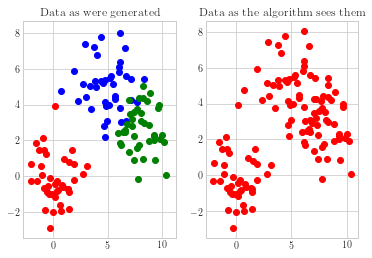

In [14]:
#Just for visualization purposes, create the labels of the 3 distributions
y = np.concatenate([np.ones((MAXN,1)),2*np.ones((MAXN,1))])
y = np.concatenate([y,3*np.ones((MAXN,1))])

plt.subplot(1,2,1)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.title('Data as were generated')

plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,1],color='r')
plt.title('Data as the algorithm sees them')

plt.savefig("sample.png",dpi=300, bbox_inches='tight')


In [15]:
from sklearn import cluster

K=3 # Assuming to be 3 clusters!

clf = cluster.KMeans(init='random', n_clusters=K)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

**Nota**: cada algoritmo de agrupación viene en dos variantes: una clase, que implementa el método *fit* para aprender los clústeres en datos de trenes, y una función *predicción*, que, dados datos de prueba, devuelve una matriz de números enteros etiquetas correspondientes a los diferentes clusters. Para la clase, las etiquetas sobre los datos de entrenamiento se pueden encontrar en el atributo *labels_*.
    

In [16]:
print(clf.labels_)    # or
print(clf.predict(X)) # equivalent

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


In [17]:
print (X[(y==1).ravel(),0]) #numpy.ravel() returns a flattened array
print (X[(y==1).ravel(),1])

[-1.08501665e+00  7.32291796e-01  1.49901723e+00 -8.86483943e-04
  1.03013365e+00  1.40895720e+00  3.78817145e-01 -7.36076456e-01
 -8.38774606e-01 -3.20230902e-01 -1.06917192e+00 -1.03146387e-01
 -5.11731999e-01  1.91856286e+00 -2.01279209e+00 -1.27554535e+00
 -6.43684184e-01 -1.49064781e+00 -1.56477211e+00  4.48695532e-01
  3.14685827e+00  1.69776942e+00 -2.46943783e-01  1.81996387e-01
 -2.07979853e+00  5.89165036e-01 -5.26929170e-01 -3.55080657e-01
  2.78216094e+00  1.41685357e+00  3.26953723e-01 -8.48021080e-01
  1.32167104e+00  9.16715884e-01  1.58674577e-01  1.87437485e+00
  1.98613746e-01 -8.98245127e-01  1.42342322e+00  8.32172265e-01]
[ 0.55733128 -1.99456837  0.78263053 -2.01677268  0.96629982 -0.7293228
 -0.27276222 -1.89627312 -0.69860657 -0.10013959  0.06473478 -1.02782089
 -0.57652641  0.63888896  0.67754139  1.45955911  1.22773815 -0.30279386
  1.83680217 -0.80156017  0.56745995  1.47137505 -2.93975815  3.9115774
 -0.28086414 -1.61756946 -0.90997762 -1.00684535  0.0854545

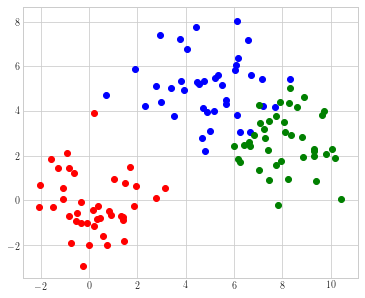

In [18]:
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

fig = plt.gcf()
fig.set_size_inches((6,5))

In [19]:
x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()] 
    # c_ translates slice objects to concatenation along the second axis.

In [20]:
Z=clf.predict(data) # returns the labels of the data
print(Z)

[2 2 2 ... 1 1 1]


**¿Cuántos "errores" tenemos?**

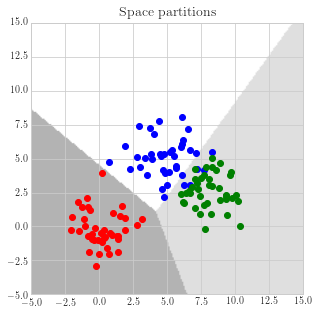

In [21]:
# Visualize space partition
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', 
           extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

fig = plt.gcf()
fig.set_size_inches((6,5))

plt.savefig("samples3.png",dpi=300, bbox_inches='tight')


In [22]:
clf = cluster.KMeans(n_clusters=K, random_state=0) 
    #initialize the k-means clustering
clf.fit(X) #run the k-means clustering

data=np.c_[XX.ravel(),YY.ravel()] 
Z=clf.predict(data) # returns the clustering labels of the data

**Visualizar etiquetas verdaderas por puntos de colores y tesselación espacial:**

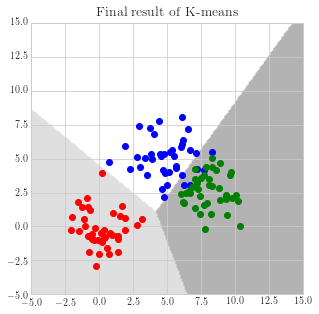

In [23]:
plt.title('Final result of K-means', size=14)

plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', 
           extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)

x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
fig = plt.gcf()
fig.set_size_inches((6,5))

plt.savefig("randscore.png",dpi=300, bbox_inches='tight')


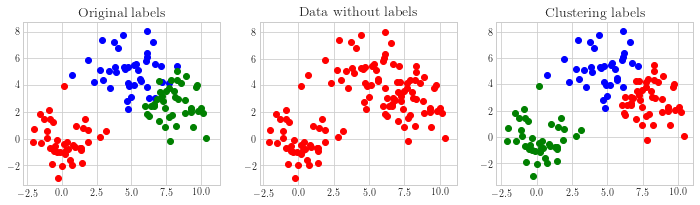

In [24]:
clf = cluster.KMeans(init='random', n_clusters=K, random_state=0) 
    #initialize the k-means clustering
clf.fit(X) #run the k-means clustering
Zx=clf.predict(X)

plt.subplot(1,3,1)
plt.title('Original labels', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b') # b
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')  # g
fig = plt.gcf()
fig.set_size_inches((12,3))

plt.subplot(1,3,2)
plt.title('Data without labels', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='r') # b
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='r')  # g
fig = plt.gcf()
fig.set_size_inches((12,3))

plt.subplot(1,3,3)
plt.title('Clustering labels', size=14)
plt.scatter(X[(Zx==1).ravel(),0],X[(Zx==1).ravel(),1],color='r')
plt.scatter(X[(Zx==2).ravel(),0],X[(Zx==2).ravel(),1],color='b')
plt.scatter(X[(Zx==0).ravel(),0],X[(Zx==0).ravel(),1],color='g')
fig = plt.gcf()
fig.set_size_inches((12,3))


El algoritmo K-means agrupa los datos tratando de separar las muestras en $ n $ grupos de igual varianza. En otras palabras, el algoritmo K-means divide un conjunto de N muestras X en K agrupamientos disjuntos C, cada uno descrito por la media de las muestras en el clúster. Los medios se llaman comúnmente clúster **"centroides"**.

      ¿Los centroides Shell pertenecen al conjunto original de puntos?

El algoritmo K-means tiene como objetivo elegir centroides minimizando un criterio conocido como la suma de cuadrados **inercia** <inercia> o **dentro del grupo**:

  Inertia=$\displaystyle\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$

**La inercia**, o el criterio de suma de cuadrados dentro del cluster, se puede reconocer como una medida de cuán consistentes son los clusters internamente coherentes.

Varios problemas deben ser tomados en cuenta:

+ Inercia hace la **suposición** de que los conglomerados son **convexos e isótropos**, lo que no siempre es el caso. 

+ ¿Puede el algoritmo asegurar **convergencía** al mínimo global? - Dado el tiempo suficiente, K-means siempre convergerá.

+ Este algoritmo requiere **el número de clústeres para ser especificado**.

+ Se adapta bien a **gran cantidad de muestras** y se ha utilizado en una amplia gama de áreas de aplicación en muchos campos diferentes.



El cálculo a menudo se realiza varias veces, con diferentes inicializaciones de los centroides. Un método para ayudar a resolver este problema es el esquema de inicialización k-means ++, que se ha implementado en scikit-learn (use el parámetro init = 'kmeans ++'). Esto inicializa los centroides para que estén (generalmente) distantes entre sí, lo que lleva a mejores resultados que la inicialización aleatoria.

**Notas:** Algunas semillas pueden dar como resultado una baja tasa de convergencia o convergencia a conglomerados subóptimos:
 
 **Resumen:**
 
 + (+) Seleccione buenas semillas usando una heurística (por ejemplo, semillas con una gran distancia entre ellas).
 + (+) Pruebe múltiples puntos de inicio.
 + (+) Inicializa con los resultados de otro método.
 
 
 + (-) Tiende a buscar clústeres esféricos.
 + (-) Propenso a la estabilización de mínimos locales.

In [25]:
from sklearn import metrics

clf = cluster.KMeans(n_clusters=K, init='k-means++',  random_state=0,                      max_iter=300, n_init=10) 
                                        #initialize the k-means clustering
clf.fit(X)                              #run the k-means clustering

print('Final evaluation of the clustering:')

print('Inertia: %.2f' %  clf.inertia_)

print('Adjusted_rand_score %.2f' % metrics.adjusted_rand_score(y.ravel(), 
                                                               clf.labels_))

print('Homogeneity %.2f' %  metrics.homogeneity_score(y.ravel(), 
                                                      clf.labels_))

print('Completeness %.2f' %  metrics.completeness_score(y.ravel(), 
                                                        clf.labels_))
             
print('V_measure %.2f' %  metrics.v_measure_score(y.ravel(), clf.labels_))

print('Silhouette %.2f' %  metrics.silhouette_score(X, clf.labels_,  
                                                    metric='euclidean'))

Final evaluation of the clustering:
Inertia: 400.94
Adjusted_rand_score 0.88
Homogeneity 0.88
Completeness 0.89
V_measure 0.88
Silhouette 0.53


In [26]:
clf1 = cluster.KMeans(n_clusters=K,  init='random', random_state=0, 
                      max_iter=2, n_init=2) 
                                    #initialize the k-means clustering
clf1.fit(X)                         #run the k-means clustering

print ('Final evaluation of the clustering:')

print ('Inertia: %.2f' % clf1.inertia_)

print ('Adjusted_rand_score %.2f' % metrics.adjusted_rand_score(y.ravel(), 
                                                            clf1.labels_))

print ('Homogeneity %.2f' % metrics.homogeneity_score(y.ravel(), 
                                                      clf1.labels_))

print ('Completeness %.2f' % metrics.completeness_score(y.ravel(), 
                                                        clf1.labels_))
             
print ('V_measure %.2f' % metrics.v_measure_score(y.ravel(), 
                                                  clf1.labels_))

print ('Silhouette %.2f' % metrics.silhouette_score(X, clf1.labels_, 
                                                    metric='euclidean'))

Final evaluation of the clustering:
Inertia: 606.72
Adjusted_rand_score 0.70
Homogeneity 0.69
Completeness 0.70
V_measure 0.69
Silhouette 0.45


### 2.3.2 Agrupamiento jerárquico

Otra técnica de agrupación interesante es la agrupación jerárquica. La agrupación jerárquica es una familia general de algoritmos de agrupamiento que crean clústeres anidados *fusionándolos o dividiéndolos* sucesivamente. Esta jerarquía de conglomerados se representa como un árbol (o dendrograma). La raíz del árbol es el clúster único que reúne todas las muestras, las *hojas* son los grupos con solo una muestra. Esta es una buena herramienta, debido a su interpretabilidad. El resultado de la técnica es un *árbol* que muestra la similitud entre las muestras. *El particionamiento* se calcula seleccionando un corte en ese árbol en un cierto nivel. El árbol generalmente se llama **dendrograma**.

**Esbozo de algoritmo de agrupamiento aglomerativo de abajo hacia arriba**

+ Comienza con cada muestra de datos en un clúster separado.
+ Luego, se une repetidamente al par más cercano de clusters.
+ Hasta que solo haya un clúster.

El historial de fusión forma un árbol binario o una jerarquía.

**Esbozo de algoritmo de agrupación divisiva de arriba hacia abajo**

+ Comenzando con todos los datos en un solo grupo.
+ Considere todas las formas posibles de dividir el clúster en dos. Elige la mejor división
+ Operar recursivamente en ambos lados.

**Agglomerative Clustering** realiza una agrupación jerárquica utilizando un enfoque ascendente: cada observación comienza en su propio clúster y los clústeres se fusionan sucesivamente.

**Definición de la similitud de dos clusters:**

El criterio de vinculación determina la métrica utilizada para la estrategia de combinación:

+ *La vinculación máxima* o *completa* minimiza la distancia máxima entre las observaciones de pares de clústeres. De acuerdo con la similitud de los dos miembros menos similares, dará racimos esféricos apretados.

+ *Promedio* la similitud entre los promedios de los miembros, es decir, minimiza el promedio de las distancias entre todas las observaciones de pares de clusters.

+ *Single* linkage funciona en la similitud de dos miembros más similares. Puede crear efectos de cadena, como seguir al vecino más cercano.

+ *Ward* minimiza la suma de las diferencias al cuadrado en todos los clusters. Es un enfoque de minimización de la varianza y en este sentido es similar a la función objetivo k-means, pero se aborda con un enfoque jerárquico aglomerativo.

AgglomerativeClustering también puede *escalar a un gran número* de muestras cuando se usa conjuntamente con una *matriz de conectividad*, pero es computacionalmente costoso cuando no se agregan restricciones de conectividad entre muestras: considera en cada paso todas las fusiones posibles.

Ahora ilustremos cómo los diferentes enlaces funcionan con un ejemplo. Vamos a generar tres grupos de la siguiente manera:

In [27]:
MAXN1 =500
MAXN2 =400
MAXN3 =300
X1 = np.concatenate ([2.25*np.random.randn(MAXN1,2),4+1.7* np.random.randn (MAXN2 ,2)])
X1 = np.concatenate ([X1,[8,3]+1.9* np.random.randn(MAXN3 ,2)])
y1 = np.concatenate ([ np.ones ((MAXN1,1)),2* np.ones((MAXN2,1))])
y1 = np.concatenate ([y1,3* np.ones((MAXN3,1))]).ravel()
y1 = np.int_(y1)
labels_y1=['+','*','o']
colors=['r','g', 'b']

Vamos a aplicar el agrupamiento aglomerativo usando los diferentes enlaces:

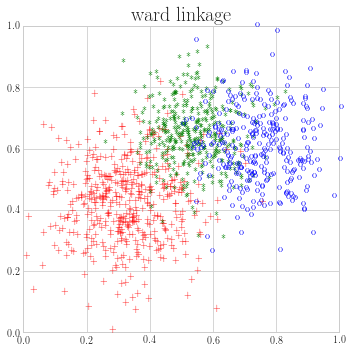

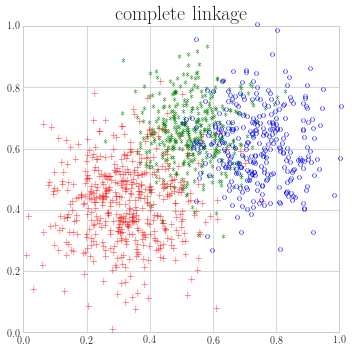

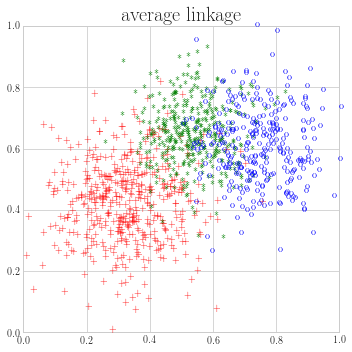

In [28]:
import time

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'complete', 'average'):
    clustering = AgglomerativeClustering(linkage=linkage,n_clusters =3)
    clustering.fit(X1)
    
    x_min , x_max = np.min (X1, axis =0) , np.max (X1,axis =0)
    X1 = (X1 - x_min ) / ( x_max - x_min )
    fig = plt.figure ()
    fig.set_size_inches((5,5))
    for i in range (X1.shape [0]) :
        plt.text(X1[i,0],X1[i,1],labels_y1[y1[i]-1],color=colors[y1[i]-1])
    plt.title ("%s linkage" % linkage,size =20)
    plt.tight_layout()
    plt.savefig("%slinkage.png" % linkage,dpi=300, bbox_inches='tight')

    
plt.show()


Agrupamiento aglomerativo tiene un comportamiento "enriquecer más rico" que conduce a *tamaños de conglomerados desiguales*. En este sentido, el enlace completo es la peor estrategia, y *Ward* da los tamaños más regulares. Sin embargo, la afinidad no se puede variar con Ward, por lo tanto, para métricas no euclidianas, *la vinculación promedio* es una buena alternativa. Vamos a ilustrar el rendimiento en algunos otros conjuntos de datos con distribuciones más complejas:

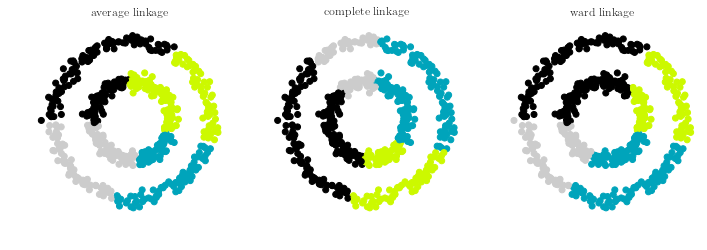

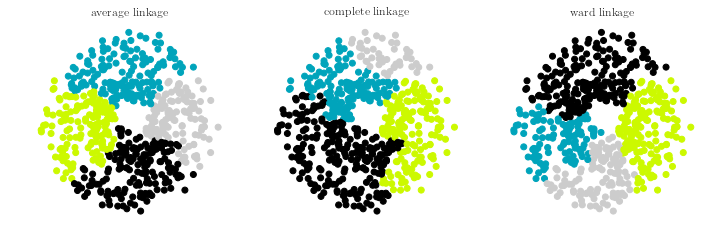

In [29]:

from sklearn import cluster, datasets
from sklearn.cluster import AgglomerativeClustering

[X1, y1]  = datasets.make_circles(n_samples=600, factor=.5, noise=.05)
[X2, y2]  = datasets.make_circles(n_samples=600, factor=.5, noise=.15)

n_clusters=4

for X in [X1,X2]:
    plt.figure(figsize=(12, 4))
    for index, linkage in enumerate(('average', 'complete', 'ward')):

            plt.subplot(1, 3, index + 1)
            model = AgglomerativeClustering(linkage=linkage,n_clusters=n_clusters)
            model.fit(X)
            plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap=plt.cm.spectral)
            plt.title('%s linkage' % linkage,fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')
    
    plt.show()



# 3. ESTUDIO DE CASO: análisis de datos EUROSTAT

Eurostat es el hogar de [datos de la Comisión Europea] (http://ec.europa.eu/eurostat). La función principal de Eurostat es procesar y publicar información estadística comparable a nivel europeo. Los datos en Eurostat son provistos por cada estado miembro. La política de reutilización de Eurostat es la reutilización gratuita de sus datos, tanto para fines no comerciales como comerciales (con algunas excepciones menores).

## Aplicación de la agrupación para analizar los países de acuerdo con sus recursos de educación

Para ilustrar la agrupación en un conjunto de datos real, analizaremos los indicadores sobre los datos de financiación de la educación entre los Estados miembros europeos, proporcionados por el banco de datos de Eurostat2. Los datos están organizados por año (TIME): [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011] y país (GEO): ['Albania', 'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Euro area (13 countries)', 'Euro area (15 countries)', 'European Union (25 countries)', 'European Union (27 countries)', 'Finland', 'Former Yugoslav Republic of Macedonia, the', 'France', 'Germany (until 1990 former territory of the FRG)', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States']. Doce indicadores (INDIC ED) sobre financiación de la educación con sus valores (Valor) se dan como:

+ 1) Gastos en instituciones educativas de fuentes privadas como % del Producto Interno Bruto (PIB), para todos los niveles de educación combinados;
+ 2) El gasto en instituciones educativas de fuentes públicas como % del PIB, para todos los niveles de gobierno combinados,
+ 3) Gastos en instituciones educativas de fuentes públicas como % del gasto público total, para todos los niveles de educación combinados,
+ 4) Subvenciones públicas al sector privado como % del PIB, para todos los niveles de educación combinados,
+ 5) Subvenciones públicas al sector privado como % del gasto público total, para todos los niveles de educación combinados, etc. Podemos almacenar en una tabla los 12 indicadores para un año determinado (por ejemplo, 2010).

Comencemos a echar un vistazo a los datos.

In [30]:
#Read and check the dataset downloaded from the EuroStat

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn import cluster

edu=pd.read_csv('educ_figdp_1_Data.csv',na_values=':')
edu.head()

,TIME,GEO,INDIC_ED,Value
0,2002,European Union (27 countries),Total public expenditure on education as % of ...,5.10
1,2002,European Union (27 countries),Total public expenditure on education as % of ...,1.14
2,2002,European Union (27 countries),Total public expenditure on education as % of ...,2.32
3,2002,European Union (27 countries),Total public expenditure on education as % of ...,1.15
4,2002,European Union (27 countries),Total public expenditure on education as % of ...,0.50


In [31]:
edu.tail()

,TIME,GEO,INDIC_ED,Value
4915,2011,Japan,Total public expenditure on education as % of ...,NaN
4916,2011,Japan,Expenditure on educational institutions from p...,NaN
4917,2011,Japan,Public subsidies to the private sector as % of...,NaN
4918,2011,Japan,Expenditure on educational institutions from p...,1.56
4919,2011,Japan,Total public expenditure on education as % of ...,3.67


Los datos en CSV y bases de datos a menudo se organizan en lo que se denomina formatos **apilados** o **registros**. En nuestro caso para cada año (`TIME`) y país (` GEO`) de la UE, así como para algunos países de referencia como Japón y Estados Unidos, tenemos doce indicadores (`INDIC_ED`) sobre financiación de la educación con sus valores ( `Value`). Para remodelar la tabla en un conjunto de datos de estilo de vector de características.

El proceso de remodelar datos apilados en una tabla a veces se denomina **pivote**.

In [32]:
#Pivot table in order to get a nice feature vector representation with dual indexing by TIME and GEO 
pivedu=pd.pivot_table(edu, values='Value', index=['TIME', 'GEO'], columns=['INDIC_ED'])
pivedu.head()

INDIC_ED       Expenditure on educational institutions from private sources as % of GDP, for all levels of education combined  \
TIME GEO                                                                                                                        
2002 Albania                                                 NaN                                                                
     Austria                                                0.38                                                                
     Belgium                                                0.36                                                                
     Bulgaria                                               0.67                                                                
     Croatia                                                0.13                                                                

INDIC_ED       Expenditure on educational institutions from public sources as % of GDP, for all levels of government combined  \
TIME GEO                                                                                                                        
2002 Albania                                                 NaN                                                                
     Austria                                                5.30                                                                
     Belgium                                                5.80                                                                
     Bulgaria                                               3.75                                                                
     Croatia                                                3.71                                                                

INDIC_ED       Expenditure on educational institutions from public sources as % of total public expenditure, for all levels of education combined  \
TIME GEO                                                                                                                                            
2002 Albania                                                 NaN                                                                                    
     Austria                                               10.46                                                                                    
     Belgium                                               11.65                                                                                    
     Bulgaria                                               9.49                                                                                    
     Croatia                                                 NaN                                                                                    

INDIC_ED       Public subsidies to the private sector as % of GDP, for all levels of education combined  \
TIME GEO                                                                                                  
2002 Albania                                                 NaN                                          
     Austria                                                0.37                                          
     Belgium                                                0.29                                          
     Bulgaria                                               0.18                                          
     Croatia                                                 NaN                                          

INDIC_ED       Public subsidies to the private sector as % of total public expenditure, for all levels of education combined  \
TIME GEO                                                                                                                       
2002 Albania                                                 NaN                                                               
     Austria  

In [33]:
print('Let us check the two indices:\n')
print('\nPrimary index (TIME): \n' + str(pivedu.index.levels[0].tolist()))
print('\nSecondary index (GEO): \n' + str(pivedu.index.levels[1].tolist()))

Let us check the two indices:


Primary index (TIME): 
[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]

Secondary index (GEO): 
['Albania', 'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Euro area (13 countries)', 'Euro area (15 countries)', 'European Union (25 countries)', 'European Union (27 countries)', 'Finland', 'Former Yugoslav Republic of Macedonia, the', 'France', 'Germany (until 1990 former territory of the FRG)', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States']


Observe que tenemos diez años de información sobre estos indicadores, y como es de esperar tenemos todos los miembros de la Unión Europea con algunos agregados y países de control / referencia. En aras de la simplicidad, centrémonos en los valores en el año 2010.

In [34]:
#Extract 2010 set of values
edu2010=pivedu.loc[2010]
edu2010.head()


INDIC_ED,"Expenditure on educational institutions from private sources as % of GDP, for all levels of education combined","Expenditure on educational institutions from public sources as % of GDP, for all levels of government combined","Expenditure on educational institutions from public sources as % of total public expenditure, for all levels of education combined","Public subsidies to the private sector as % of GDP, for all levels of education combined","Public subsidies to the private sector as % of total public expenditure, for all levels of education combined","Total public expenditure on education as % of GDP, at pre-primary level of education (ISCED 0) and not allocated by level","Total public expenditure on education as % of GDP, at primary level of education (ISCED 1)","Total public expenditure on education as % of GDP, at secondary level of education (ISCED 2-4)","Total public expenditure on education as % of GDP, at tertiary level of education (ISCED 5-6)","Total public expenditure on education as % of GDP, for all levels of education combined","Total public expenditure on education as % of gross national income, for all levels of education combined","Total public expenditure on education as % of total public expenditure, for all levels of education combined"
GEO,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Austria,0.52,5.25,9.98,0.64,1.22,0.61,1.01,2.64,1.63,5.89,5.90,11.20
Belgium,0.34,6.25,11.90,0.32,0.61,0.78,1.54,2.79,1.46,6.57,6.44,12.51
Bulgaria,0.63,3.35,8.96,0.74,1.99,0.92,0.80,1.76,0.61,4.10,4.18,10.95
Croatia,0.26,4.24,NaN,0.03,NaN,0.65,1.87,0.97,0.78,4.27,4.42,NaN


Vamos a limpiar y almacenar los nombres de las características y los países.

In [35]:
#Store column names and clear them for better handling. Do the same with countries
edu2010 = edu2010.rename(index={'Euro area (13 countries)': 'EU13',
                                'Euro area (15 countries)': 'EU15',
                                'European Union (25 countries)': 'EU25',
                                'European Union (27 countries)': 'EU27',
                                'Former Yugoslav Republic of Macedonia, the': 'Macedonia',
                                'Germany (until 1990 former territory of the FRG)': 'Germany'
                        })
features = edu2010.columns.tolist()

countries = edu2010.index.tolist()

edu2010.columns=range(12)
edu2010.head()

,0,1,2,3,4,5,6,7,8,9,10,11
GEO,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Austria,0.52,5.25,9.98,0.64,1.22,0.61,1.01,2.64,1.63,5.89,5.90,11.20
Belgium,0.34,6.25,11.90,0.32,0.61,0.78,1.54,2.79,1.46,6.57,6.44,12.51
Bulgaria,0.63,3.35,8.96,0.74,1.99,0.92,0.80,1.76,0.61,4.10,4.18,10.95
Croatia,0.26,4.24,NaN,0.03,NaN,0.65,1.87,0.97,0.78,4.27,4.42,NaN


Como podemos observar, este no es un conjunto de datos limpio, faltan valores. Algunos países pueden no recopilar o tener acceso a algunos indicadores y hay países sin ningún indicador. Permítanos mostrar este efecto.

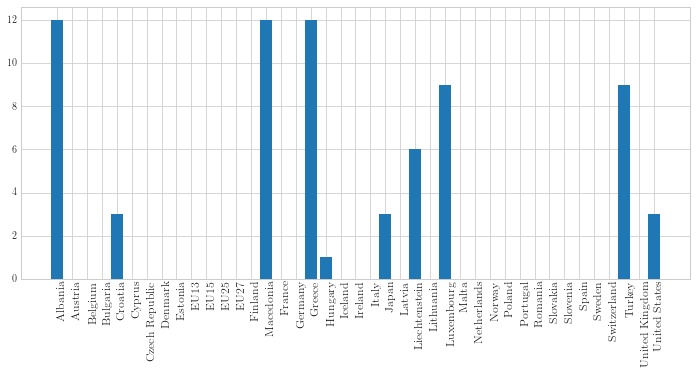

In [36]:
#Check what is going on in the NaN data 
nan_countries=np.sum(np.where(edu2010.isnull(),1,0),axis=1)
plt.bar(np.arange(nan_countries.shape[0]),nan_countries)
plt.xticks(np.arange(nan_countries.shape[0]),countries,rotation=90,horizontalalignment='left',
           fontsize=12)
fig = plt.gcf()
fig.set_size_inches((12,5))

No tenemos información sobre Albania, Macedonia y Grecia. Y una información muy limitada de Liechtenstein, Luxemburgo y Turquía. Entonces, trabajemos sin ellos. Ahora veamos las características.

[1 0 3 0 3 0 0 0 0 0 0 3]


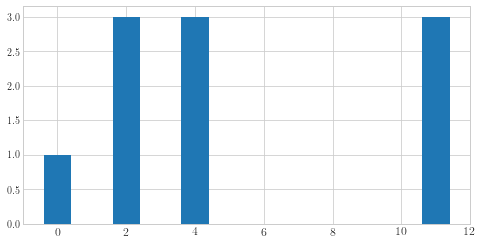

In [37]:
#Remove non info countries
wrk_countries = nan_countries<4

educlean=edu2010.loc[wrk_countries] #.ix - Construct an open mesh from multiple sequences.

#Let us check the features we have
na_features = np.sum(np.where(educlean.isnull(),1,0),axis=0)
print(na_features)

plt.bar(np.arange(na_features.shape[0]),na_features)
plt.xticks(fontsize=12)
fig = plt.gcf()
fig.set_size_inches((8,4))

Hay cuatro características con datos faltantes. En este punto, podemos proceder de dos maneras:

+ **Complete** las características con algunos datos no informativos y no sesgados.
+ **Eliminar** las características con valores perdidos.

Si tenemos muchas características y solo unas pocas tienen valores perdidos, entonces no es muy dañino descartarlas. Sin embargo, si los valores faltantes se extienden a través de las características, tenemos que lidiar finalmente con ellos. En nuestro caso, ambas opciones parecen razonables, por lo que procederemos con ambas al mismo tiempo.

In [38]:
#Option A fills those features with some value, at risk of extracting wrong information
#Constant filling : edufill0=educlean.fillna(0)
edufill=educlean.fillna(educlean.mean())
print('Filled in data shape: ' + str(edufill.shape))

#Option B drops those features
edudrop=educlean.dropna(axis=1) 
         #dropna: Return object with labels on given axis omitted where alternately any or 
          # all of the data are missing
print('Drop data shape: ' + str(edudrop.shape))



Filled in data shape: (35, 12)
Drop data shape: (35, 8)


En la opción de relleno, hemos decidido completar los datos con el valor medio de la característica. Esto no sesgará la distribución de la característica, aunque tiene consecuencias en la interpretación de los resultados.

Ahora apliquemos una técnica de agrupación de K-means en esta información para dividir los países según su inversión en educación y verificar sus perfiles.

In [39]:
scaler = StandardScaler() #Standardize features by removing the mean and scaling to unit variance

X_train_fill = edufill.values
X_train_fill = scaler.fit_transform(X_train_fill)

clf = cluster.KMeans(init='k-means++', n_clusters=3, random_state=42)
    
clf.fit(X_train_fill) #Compute k-means clustering.

y_pred_fill = clf.predict(X_train_fill) 
        #Predict the closest cluster each sample in X belongs to.

idx=y_pred_fill.argsort()

Visualicemos el resultado del agrupamiento K-means:

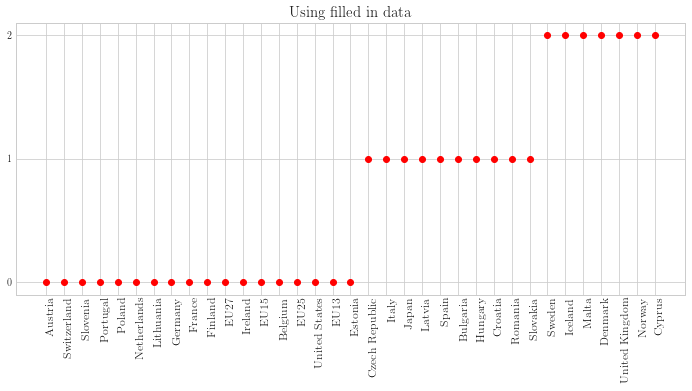

In [40]:
plt.plot(np.arange(35),y_pred_fill[idx],'ro')
wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]

plt.xticks(np.arange(len(wrk_countries_names)),[wrk_countries_names[i] for i in idx],
           rotation=90,horizontalalignment='left',fontsize=12)
plt.title('Using filled in data', size=15)
plt.yticks([0,1,2])
fig = plt.gcf()

fig.set_size_inches((12,5))

Vamos a aplicar la agrupación en el conjunto de datos con los valores perdidos perdidos:

In [41]:
X_train_drop = edudrop.values
X_train_drop = scaler.fit_transform(X_train_drop)
    
clf.fit(X_train_drop) #Compute k-means clustering.
y_pred_drop = clf.predict(X_train_drop) #Predict the closest cluster of each sample in X.

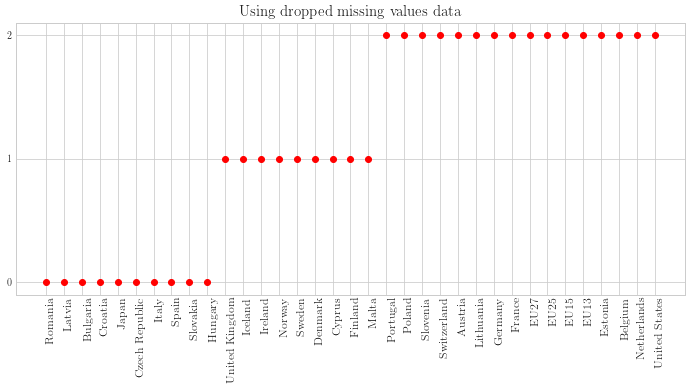

In [42]:
idx=y_pred_drop.argsort()
plt.plot(np.arange(35),y_pred_drop[idx],'ro')
wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]

plt.xticks(np.arange(len(wrk_countries_names)),[wrk_countries_names[i] for i in idx],
           rotation=90,horizontalalignment='left',fontsize=12)
plt.title('Using dropped missing values data',size=15)
fig = plt.gcf()
plt.yticks([0,1,2])
fig.set_size_inches((12,5))


Hemos ordenado los datos para una mejor visualización. A simple vista, podemos ver que ambas particiones pueden ser diferentes. Podemos verificar mejor este efecto trazando los valores de clusters de una técnica contra la otra.

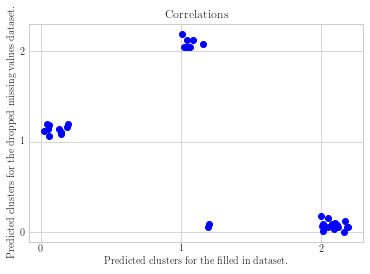

In [43]:
plt.plot(y_pred_drop+0.2*np.random.rand(35),y_pred_fill+0.2*np.random.rand(35),'bo')
plt.xlabel('Predicted clusters for the filled in dataset.')
plt.ylabel('Predicted clusters for the dropped missing values dataset.')
plt.title('Correlations')
plt.xticks([0,1,2])
plt.yticks([0,1,2])
plt.savefig("correlationkmeans.png",dpi=300, bbox_inches='tight')


Bueno, mirando ambos métodos, ambos pueden arrojar los mismos resultados, pero no necesariamente siempre. Esto se debe principalmente a dos aspectos: la inicialización aleatoria de la agrupación k-means y el hecho de que cada método funciona en un espacio diferente (datos descartados versus datos completados).

Veamos la lista de países en ambos métodos. Tenga en cuenta que no deberíamos considerar el valor del clúster, ya que es irrelevante.

In [44]:
print( 'Cluster 0: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_fill) 
                             if item==0]))
print( 'Cluster 0: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_drop) 
                             if item==0]))
print( '\n')
print('Cluster 1: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_fill) 
                             if item==1]))
print( 'Cluster 1: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_drop) 
                             if item==1]))
print( '\n')
print( 'Cluster 2: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_fill) 
                             if item==2]))
print( 'Cluster 2: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_drop) 
                             if item==2]))
print( '\n')


Cluster 0: 
['Austria', 'Belgium', 'Estonia', 'EU13', 'EU15', 'EU25', 'EU27', 'Finland', 'France', 'Germany', 'Ireland', 'Lithuania', 'Netherlands', 'Poland', 'Portugal', 'Slovenia', 'Switzerland', 'United States']
Cluster 0: 
['Bulgaria', 'Croatia', 'Czech Republic', 'Hungary', 'Italy', 'Japan', 'Latvia', 'Romania', 'Slovakia', 'Spain']


Cluster 1: 
['Bulgaria', 'Croatia', 'Czech Republic', 'Hungary', 'Italy', 'Japan', 'Latvia', 'Romania', 'Slovakia', 'Spain']
Cluster 1: 
['Cyprus', 'Denmark', 'Finland', 'Iceland', 'Ireland', 'Malta', 'Norway', 'Sweden', 'United Kingdom']


Cluster 2: 
['Cyprus', 'Denmark', 'Iceland', 'Malta', 'Norway', 'Sweden', 'United Kingdom']
Cluster 2: 
['Austria', 'Belgium', 'Estonia', 'EU13', 'EU15', 'EU25', 'EU27', 'France', 'Germany', 'Lithuania', 'Netherlands', 'Poland', 'Portugal', 'Slovenia', 'Switzerland', 'United States']




Vamos a verificar el perfil de los clusters mirando los centroides:

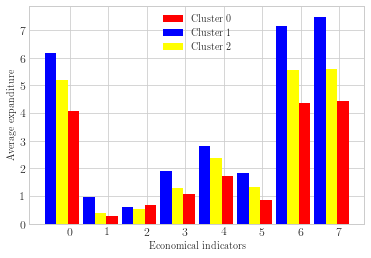

In [45]:
width=0.3
p1 = plt.bar(np.arange(8),scaler.inverse_transform(clf.cluster_centers_[1]),width,color='b')
        # Scale back the data to the original representation
p2 = plt.bar(np.arange(8)+width,scaler.inverse_transform(clf.cluster_centers_[2]),
             width,color='yellow')
p0 = plt.bar(np.arange(8)+2*width,scaler.inverse_transform(clf.cluster_centers_[0]),
             width,color='r')

plt.legend( (p0[0], p1[0], p2[0]), ('Cluster 0', 'Cluster 1', 'Cluster 2') ,loc=9)
plt.xticks(np.arange(8) + 0.5, np.arange(8),size=12)
plt.yticks(size=12)
plt.xlabel('Economical indicators')
plt.ylabel('Average expanditure')
fig = plt.gcf()

plt.savefig("clusterexpenditure.png",dpi=300, bbox_inches='tight')


Parece que el cluster `1` gasta más en educación, mientras que el cluster` 0` es el que tiene menos recursos en educación.

Permítanos refinar un poco más el clúster `0` y verifique cuán cerca están los miembros de este clúster al clúster` 1`. Esto puede darnos una pista sobre un posible pedido.

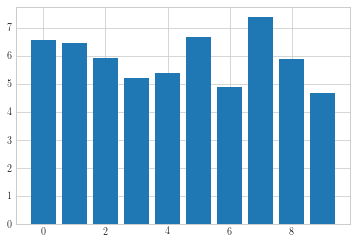

In [46]:
from scipy.spatial import distance
p = np.squeeze(np.asarray(distance.cdist(X_train_drop[y_pred_drop==0,:],[clf.cluster_centers_[1]],'euclidean')))
                  #the distance of the elements of cluster 0 to the center of cluster 1
plt.bar(np.arange(p.shape[0]),p)

wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]
zero_countries_names = [wrk_countries_names[i] for i,item in enumerate(y_pred_drop) 
                        if item==0]
#plt.xticks(np.arange(len(zero_countries_names)),zero_countries_names,rotation=90,
           #horizontalalignment='left',fontsize=12)



Además, también podemos verificar la distancia al centroide del clúster `0`.

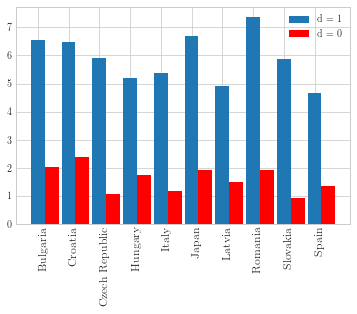

In [47]:
from scipy.spatial import distance
p = np.squeeze(np.asarray(distance.cdist(X_train_drop[y_pred_drop==0,:],[clf.cluster_centers_[1]],'euclidean')))
pown = np.squeeze(np.asarray(distance.cdist(X_train_drop[y_pred_drop==0,:],[clf.cluster_centers_[0]],'euclidean')))

width=0.45
p0=plt.bar(np.arange(p.shape[0]),p,width)
p1=plt.bar(np.arange(p.shape[0])+width,pown,width,color = 'red')

wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]
zero_countries_names = [wrk_countries_names[i] for i,item in enumerate(y_pred_drop) 
                        if item==0]
plt.xticks(np.arange(len(zero_countries_names)),zero_countries_names,rotation=90,
           horizontalalignment='left',fontsize=12)
plt.legend( (p0[0], p1[0]), ('d = 1', 'd = 0') ,loc=1)
plt.savefig("dist2cluster01.png",dpi=300, bbox_inches='tight')


Vamos a volver a hacer la agrupación con $ K = 4 $ y ver qué podemos concluir.

In [48]:
X_train = edudrop.values
clf = cluster.KMeans(init='k-means++', n_clusters=4, random_state=0)
clf.fit(X_train)
y_pred = clf.predict(X_train)

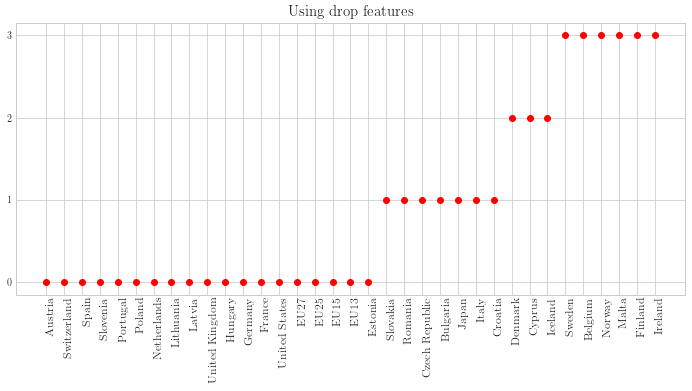

In [49]:
idx=y_pred.argsort()
plt.plot(np.arange(35),y_pred[idx],'ro')
wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]

plt.xticks(np.arange(len(wrk_countries_names)),[wrk_countries_names[i] for i in idx],rotation=90,
           horizontalalignment='left',fontsize=12)
plt.title('Using drop features',size=15)
plt.yticks([0,1,2,3])
fig = plt.gcf()
fig.set_size_inches((12,5))

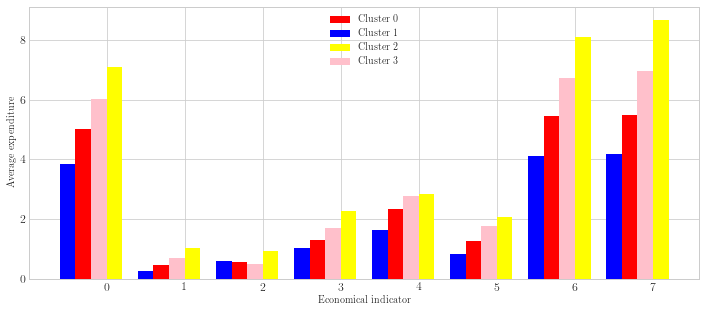

In [50]:
width=0.2
p0 = plt.bar(np.arange(8)+1*width,clf.cluster_centers_[0],width,color='r')
p1 = plt.bar(np.arange(8),clf.cluster_centers_[1],width,color='b')
p2 = plt.bar(np.arange(8)+3*width,clf.cluster_centers_[2],width,color='yellow')
p3 = plt.bar(np.arange(8)+2*width,clf.cluster_centers_[3],width,color='pink')

plt.legend( (p0[0], p1[0], p2[0], p3[0]), ('Cluster 0', 'Cluster 1', 'Cluster 2', 
                                           'Cluster 3') ,loc=9)
plt.xticks(np.arange(8) + 0.5, np.arange(8),size=12)
plt.yticks(size=12)
plt.xlabel('Economical indicator')
plt.ylabel('Average expenditure')
fig = plt.gcf()
fig.set_size_inches((12,5))
plt.savefig("distances4clusters.png",dpi=300, bbox_inches='tight')


España todavía está en el cluster `0`. Pero como observamos en nuestra agrupación anterior, estuvo muy cerca de cambiar el clúster. Esta vez, el clúster `0` incluye los valores de promedios para los miembros de la UE. Solo para completar, escriba el nombre de los países en los clusters.

In [51]:
print('Cluster 0: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred) if item==0]))

print('Cluster 1: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred) if item==1]))

print('Cluster 2: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred) if item==2]))

print('Cluster 3: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred) if item==3]))

#Save data for future use.
import pickle
ofname = open('edu2010.pkl', 'wb')
s = pickle.dump([edu2010, wrk_countries_names,y_pred ],ofname)
ofname.close()

Cluster 0: 
['Austria', 'Estonia', 'EU13', 'EU15', 'EU25', 'EU27', 'France', 'Germany', 'Hungary', 'Latvia', 'Lithuania', 'Netherlands', 'Poland', 'Portugal', 'Slovenia', 'Spain', 'Switzerland', 'United Kingdom', 'United States']
Cluster 1: 
['Bulgaria', 'Croatia', 'Czech Republic', 'Italy', 'Japan', 'Romania', 'Slovakia']
Cluster 2: 
['Cyprus', 'Denmark', 'Iceland']
Cluster 3: 
['Belgium', 'Finland', 'Ireland', 'Malta', 'Norway', 'Sweden']


Podemos repetir el proceso utilizando las técnicas de agrupamiento alternativas y comparar sus resultados. Primero apliquemos el agrupamiento espectral. El código correspondiente será:

In [52]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import euclidean_distances

X = StandardScaler().fit_transform(edudrop.values)
 
distances = euclidean_distances(edudrop.values)
    
spectral = cluster.SpectralClustering(n_clusters=4, affinity="nearest_neighbors")
spectral.fit(edudrop.values)
 
y_pred = spectral.labels_.astype(np.int)

Si visualizamos los resultados:

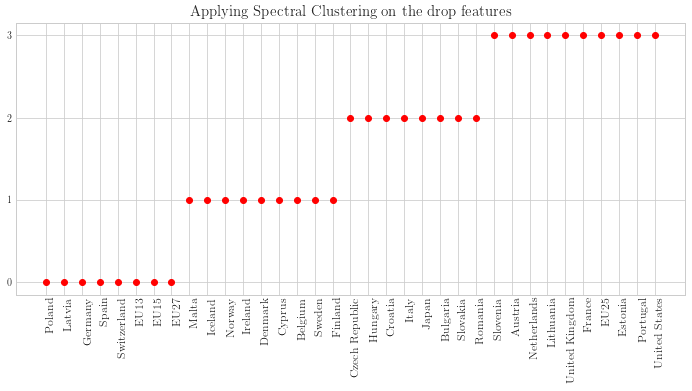

In [53]:
idx=y_pred.argsort()

plt.plot(np.arange(35),y_pred[idx],'ro')
wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]

plt.xticks(np.arange(len(wrk_countries_names)),[wrk_countries_names[i] 
        for i in idx],rotation=90,horizontalalignment='left',fontsize=12)

plt.yticks([0,1,2,3])

plt.title('Applying Spectral Clustering on the drop features',size=15)
fig = plt.gcf()
fig.set_size_inches((12,5))

Aplicando el agrupamiento aglomerativo, obtenemos no solo los diferentes clusters, sino que también podemos ver cómo se obtienen los diferentes clusters. Esto, de alguna manera, nos está dando información sobre cuáles son los pares de países y conglomerados que son más similares. El código correspondiente que aplica el agrupamiento aglomerativo es:

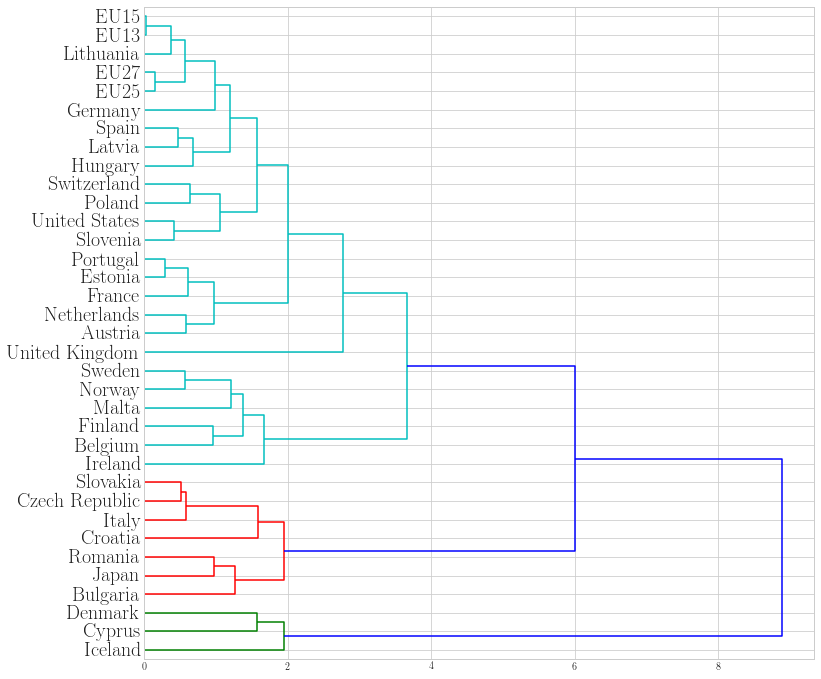

In [54]:
X_train = edudrop.values
dist = pdist(X_train,'euclidean')
linkage_matrix = linkage(dist,method = 'complete');
plt.figure()  # we need a tall figure
fig = plt.gcf()
fig.set_size_inches((12,12))
dendrogram(linkage_matrix, orientation="right", color_threshold = 4,labels = wrk_countries_names, leaf_font_size=20);

plt.savefig("ACCountires.png",dpi=300, bbox_inches='tight')
plt.show()

#plt.tight_layout()  # fixes margins


En scikit-learn, el parámetro color \ _threshold colorea todos los enlaces descendentes debajo de un nodo de clúster k del mismo color si k es el primer nodo debajo del umbral de color. Todos los enlaces que conectan nodos con distancias mayores o iguales al umbral son de color azul. Por lo tanto, si usamos el umbral de color = 3, los clústeres obtenidos son los siguientes:
+ Cluster 0: ['Cyprus', 'Denmark', 'Iceland']
+ Cluster 1: ['Bulgaria', 'Croatia', 'Czech Republic', 'Italy', 'Japan', 'Romania', 'Slovakia']
+ Cluster 2: ['Belgium', 'Finland', 'Ireland', 'Malta', 'Norway', 'Sweden']
+ Cluster 3: ['Austria', 'Estonia', 'EU13', 'EU15', 'EU25', 'EU27', 'France', 'Germany', 'Hungary', 'Latvia', 'Lithuania', 'Netherlands', 'Poland', 'Portugal', 'Slovenia', 'Spain', 'Switzerland', 'United Kingdom', 'United States']

Tenga en cuenta que corresponden en alto grado a los grupos obtenidos por los K-means (excepto la permutación de las etiquetas de los clusters que es irrelevante). La figura muestra la construcción de los clusters utilizando el agrupamiento aglomerativo de ligamiento completo. Diferentes cortes en diferentes niveles del dendrograma permiten obtener diferentes cantidades de clústeres. Como resumen, comparemos los resultados de los tres enfoques de agrupamiento. No podemos esperar que los resultados coincidan, ya que los diferentes enfoques se basan en diferentes criterios para construir los clusters. Aún así, podemos observar que en este caso los K-means y los enfoques aglomerativos dieron los mismos resultados (hasta una permutación del número de clúster que es irrelevante), mientras que la agrupación espectral dio clusters distribuidos de manera más uniforme. Fundió el clúster 0 y 2 del agrupamiento aglomerativo en el clúster 1 y dividió el clúster 3 del agrupamiento aglomerativo en los grupos 0 y 3 del mismo. Tenga en cuenta que estos resultados pueden cambiar cuando se usa una distancia diferente entre los datos.